The measured and model response matrices are defined by

$$\begin{pmatrix} x \\ y \end{pmatrix} = M_{meas,model} \begin{pmatrix} \theta_x \\ \theta_y \end{pmatrix}$$
where $\theta_x$and $\theta_y$  are the changes in steering magnet strengths,
and x , y are the resulting orbit perturbations.

The parameters in the used model is varied by LOCO to minimize the $ \chi^2 $ deviation between the model
and measured orbit response matrices $M_{model}$ and $M_{measured}$
$$  \chi^2 = \sum_{i,j} \frac{(M_{model,i,j}-M_{measured,i,j})^2}{\sigma^2_{i}} = \sum_{i,j} E_{k=(i,j)}^2 $$

The $\chi^2$ minimization is achieved by iteratively solving the linear equation
$$E_{k}^{new}= E_k +\frac{\partial{E_k}}{\partial{k_l}} \Delta k_l =0$$
$$-E_k= \frac{\partial{E_k}}{\partial{k_l}} \Delta k_l$$


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at_modules import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random

LOCO, AT version


In [2]:
# The lattice

from lattice import *
ring=at.Lattice(ring3, energy=1)
ring.radiation_off()

In [3]:
ring[5]

Quadrupole('QS', 0.1, 0.0, R1=array([[ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [-0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        , -0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , 1.        ]]), R2=array([[ 0.70710678,  0.        , -0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        , -0.70710678,  0.        , 0.        ], [ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , 1.        ]]))

(40, 40)


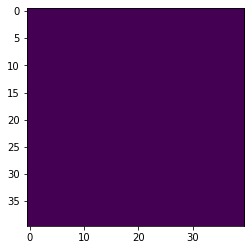

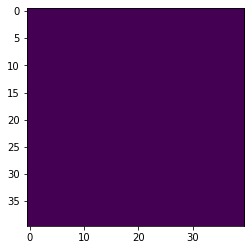

In [4]:
Cxx, Cxy= ORM_x(1.e-4, ring)
Cyy, Cyx= ORM_y(1.e-4, ring)

print(shape(Cxx))

plotORM(Cxy)
plotORM(Cyx)

preparing twiss ..
Tunes=[0.39223152 0.39336109]
Chrom=[-2.67735312 -1.96249018]


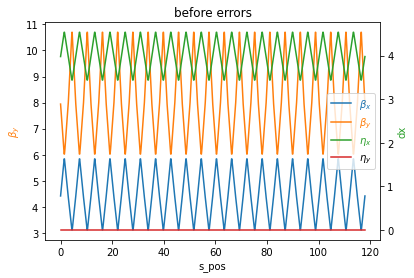

In [5]:
twiss = getOptics(ring, '*')
make_plot(twiss, 'before errors')

In [6]:
quads_info = quad_info_qs(ring)
quad_dict,quad_vals = getQuadFamilies(quads_info)
quads = [ k for k in quad_dict.keys()]

qs_indexes = get_refpts(ring, 'QS')

In [7]:
quads_info

,s_pos,Quad_strength,elements_name,occ,occ1
0,1.5,0.0,QS,0,1
1,7.4,0.0,QS,1,2
2,13.3,0.0,QS,2,3
3,19.2,0.0,QS,3,4
4,25.1,0.0,QS,4,5
5,31.0,0.0,QS,5,6
6,36.9,0.0,QS,6,7
7,42.8,0.0,QS,7,8
8,48.7,0.0,QS,8,9
9,54.6,0.0,QS,9,10


In [8]:
%%time

qs_indexes = get_refpts(ring, 'QS')
dk = 0.0001
qxx = []
qxy =[]
qyy = []
qyx =[]
print('generating response to '+str(ring[qs_indexes[1]].FamName))
for i in range(len(qs_indexes)):
    Qxx, Qxy, Qyy, Qyx = computeOpticsQS(ring, 'QS', i, dk, qs_indexes)
    qxx.append(Qxx)
    qxy.append(Qxy)
    qyy.append(Qyy)
    qyx.append(Qyx)

generating response to QS
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
before 0.0
after 0.0001
final qs 0.0
Wall time: 22.8 s


In [9]:
C0x = Cxx
C0y = Cyy
C0xy = Cxy
C0yx = Cyx

dCx = []
dCy = []
dCxy = []
dCyx = []

print('loading response to: QS')
i = 0
while(i<len(qxx)):

    C1x = qxx[i]
    C1y = qyy[i]
    C1xy = qxy[i]
    C1yx = qyx[i]
    dcxx = ( (C1x-C0x)  / dk)
    dcyy = ( (C1y-C0y) /dk)

    dCxy.append( (C1xy-C0xy)/ dk)
    dCyx.append( (C1yx-C0yx)/ dk)

    dCx.append(dcxx)
    dCy.append(dcyy)

    i += 1

loading response to: QS


In [10]:
#Qs_strength

qs_indexes = get_refpts(ring, 'QS')
errorQS = 5.e-2
for i in range(len(qs_indexes)):
    ring[qs_indexes[i]].K = (errorQS * random())

In [12]:
quads_info_error = simulateError_tilt_qs(ring,0.0,0.0,0.0 ,0.0, 0.0)

simulating perturbed machine...


In [13]:
quads_info_error

,s_pos,Quad_strength,elements_name,occ
0,1.5,0.031506,QS,1
1,7.4,0.021187,QS,2
2,13.3,0.016782,QS,3
3,19.2,0.002333,QS,4
4,25.1,0.015804,QS,5
5,31.0,0.000564,QS,6
6,36.9,0.009636,QS,7
7,42.8,0.013465,QS,8
8,48.7,0.047453,QS,9
9,54.6,0.045249,QS,10


In [14]:
ring[5]

Quadrupole('QS', 0.1, 0.03150631027853334, R1=array([[ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [-0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        , -0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , 1.        ]]), R2=array([[ 0.70710678,  0.        , -0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        , -0.70710678,  0.        , 0.        ], [ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , 

preparing twiss ..
Tunes=[0.39040495 0.39523159]
Chrom=[-2.36912851 -2.27415886]


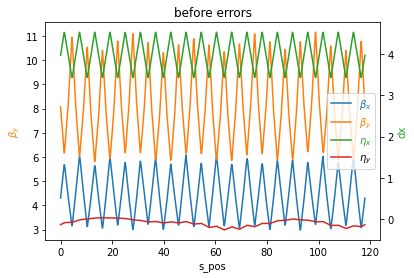

In [15]:
twiss_error = getOptics(ring, '*')
make_plot(twiss_error, 'before errors')

(40, 40)


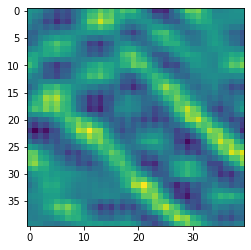

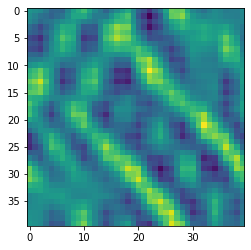

In [17]:
Cxx_error, Cxy_error= ORM_x(1.e-4, ring)
Cyy_error, Cyx_error= ORM_y(1.e-4, ring)

print(shape(Cxx_error))

plt.figure()
imshow(Cxy_error)
plt.show()

plt.figure()
imshow(Cyx_error)
plt.show()

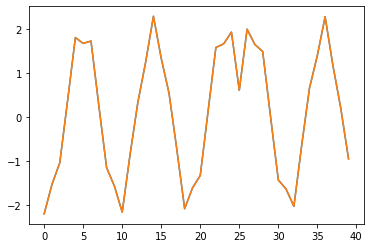

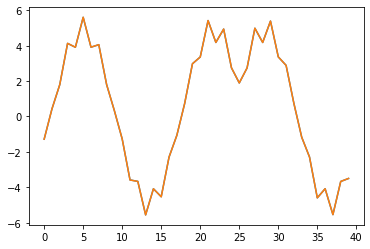

In [18]:
plt.plot(Cxx_error[25])
plt.plot((Cxx[25]))
plt.show()


plt.plot(Cyy[25])
plt.plot((Cyy_error[25]))
plt.show()

In [19]:
np.max(Cxx_error-Cxx)

0.00401998518136043

In [20]:
Nk = len(dCx) #number of free parameters
Nm = 40 # number of measurements
print('NK:', Nk)
print('Nm:', Nm)

Ax = np.zeros([Nk,Nk])
Ay = np.zeros([Nk,Nk])
Axy = np.zeros([Nk,Nk])
Ayx = np.zeros([Nk,Nk])

A = np.zeros([4*Nk,Nk])

##

Bx = np.zeros([Nk,1])
By = np.zeros([Nk,1])
Bxy = np.zeros([Nk,1])
Byx = np.zeros([Nk,1])

B = np.zeros([4*Nk,1])

##

Dx = (Cxx_error[0:Nm,:] - C0x[0:Nm,:]) ### dk ?
Dy = (Cyy_error[0:Nm,:] - C0y[0:Nm,:])
Dxy = (Cxy_error[0:Nm,:] - C0xy[0:Nm,:])
Dyx = (Cyx_error[0:Nm,:] - C0yx[0:Nm,:])

##

for i in range(Nk): ## i represents each quad
    #print('done A:', 100.* i ,'%')
    for j in range(Nk):
        Ax[i,j] = np.sum(np.dot(dCx[i],dCx[j].T) )
        Ay[i,j] = np.sum(np.dot(dCy[i],dCy[j].T) )
        Axy[i,j] = np.sum(np.dot(dCxy[i],dCxy[j].T) )
        Ayx[i,j] = np.sum(np.dot(dCyx[i],dCyx[j].T) )
    A[i,:] = Ax[i,:]
    A[i+Nk,:] = Ay[i,:]
    A[i+2*Nk,:] = Axy[i,:]
    A[i+3*Nk,:] = Ayx[i,:]

##

for i in range(Nk):
    Bx[i] = np.sum( np.dot(dCx[i], Dx.T) )
    By[i] = np.sum( np.dot(dCy[i], Dy.T) )
    Bxy[i] = np.sum( np.dot(dCxy[i], Dxy.T) )
    Byx[i] = np.sum( np.dot(dCyx[i], Dyx.T) )
    B[i] = Bx[i]
    B[i+Nk] = By[i]
    B[i+2*Nk] = Bxy[i]
    B[i+3*Nk] = Byx[i]

NK: 20
Nm: 40


number of singular values 20
A(80, 20) B(80, 1) U(80, 80) smat(80, 20) v(20, 20)


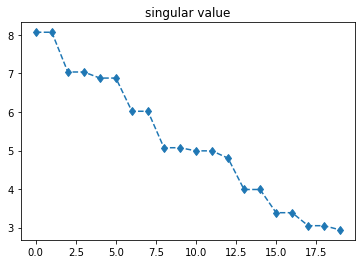

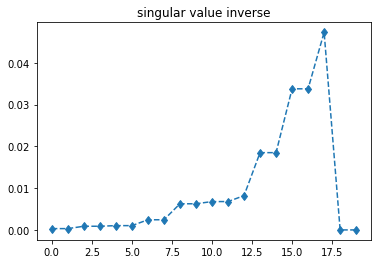

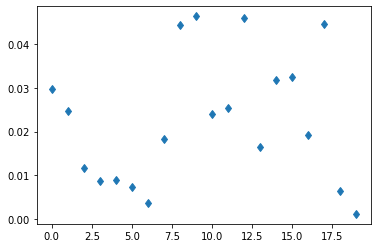

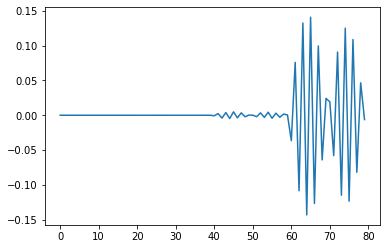

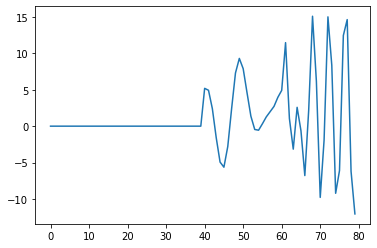

In [23]:
u,s,v=np.linalg.svd(A,full_matrices=True)

smat = 0.0 * A
si = s**-1
n_sv = 18
si[n_sv:] *= 0.0

print("number of singular values {}".format(len(si)))
smat[:Nk,:Nk] = np.diag(si)

print('A'+str(A.shape), 'B'+str(B.shape),'U'+str(u.shape), 'smat'+str(smat.shape), 'v'+str(v.shape))

plt.plot(np.log(s),'d--')
plt.title('singular value')
plt.show()

plt.plot(si,'d--')
plt.title('singular value inverse')
plt.show()

Ai=np.dot(v.transpose(),np.dot(smat.transpose(),u.transpose()))

###
r = ( np.dot(Ai,B)).reshape(-1)
plot(r,'d')
plt.show()


# error
e = np.dot(A,r).reshape(-1) - B.reshape(-1)
plt.plot(e)
plt.show()
plt.plot(B)
plt.show()

In [24]:
# check correction...
quad_dict,quad_vals = getQuadFamilies(quads_info_error)
n_list = len(quads_info_error.s_pos)
print(n_list)

quad_names = quads
iq = 0
frac = 1.0
cor_dict = {}
for qname in quad_names:
    nquad = quad_dict[qname]
    #print(qname, quad_dict[qname])
    for i in range(0, nquad):
        cor_dict[qname, i+1] = -r[iq]*frac
        iq += 1

20


In [25]:
quads_info_error

,s_pos,Quad_strength,elements_name,occ
0,1.5,0.031506,QS,1
1,7.4,0.021187,QS,2
2,13.3,0.016782,QS,3
3,19.2,0.002333,QS,4
4,25.1,0.015804,QS,5
5,31.0,0.000564,QS,6
6,36.9,0.009636,QS,7
7,42.8,0.013465,QS,8
8,48.7,0.047453,QS,9
9,54.6,0.045249,QS,10


In [26]:
quads_info

,s_pos,Quad_strength,elements_name,occ,occ1
0,1.5,0.0,QS,0,1
1,7.4,0.0,QS,1,2
2,13.3,0.0,QS,2,3
3,19.2,0.0,QS,3,4
4,25.1,0.0,QS,4,5
5,31.0,0.0,QS,5,6
6,36.9,0.0,QS,6,7
7,42.8,0.0,QS,7,8
8,48.7,0.0,QS,8,9
9,54.6,0.0,QS,9,10


In [27]:
DK = []
for idx in range(n_list):
   qname = quads_info.elements_name[idx]  # ElementName
   occ = quads_info_error.occ[idx]
   dk = cor_dict['QS',occ]
   DK.append(dk)

quads_indexes = get_refpts(ring, 'QS')
i = 0
while (i < len(quads_indexes)):
      print(ring[quads_indexes[i]].K)
      ring[quads_indexes[i]].K += DK[i]
      print(DK[i])
      print(ring[quads_indexes[i]].K)
      i += 1

0.03150631027853334
-0.029740077274930138
0.0017662330036032
0.021187233502028863
-0.024825311305098602
-0.003638077803069739
0.01678200613117984
-0.011574912184341563
0.005207093946838277
0.0023325141556379213
-0.008635676920940388
-0.0063031627653024665
0.015803865621207648
-0.008976544554773048
0.0068273210664346
0.0005639033660632232
-0.007297266644429645
-0.006733363278366422
0.009635777663665586
-0.0036094882282868695
0.006026289435378716
0.013464607123817607
-0.018238691643125735
-0.004774084519308127
0.047452639642692154
-0.04435687814132934
0.003095761501362815
0.04524867300833019
-0.04642303244258327
-0.0011743594342530847
0.023088268355082903
-0.02392758176548035
-0.0008393134103974464
0.028140846188745662
-0.025447866180605516
0.002692980008140146
0.041674550055536254
-0.04596672899010697
-0.004292178934570713
0.02183507582805226
-0.016476489738506912
0.005358586089545349
0.0259452495323303
-0.031840769987409076
-0.005895520455078775
0.03838978530316072
-0.03258578983762159

In [28]:
ring[20]

Quadrupole('QS', 0.1, -0.003638077803069739, R1=array([[ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [-0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        , -0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , 1.        ]]), R2=array([[ 0.70710678,  0.        , -0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        , -0.70710678,  0.        , 0.        ], [ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        , 0.        ], [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        , 0.        ], [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        

In [29]:
twiss_corrected = getOptics(ring, '*')

preparing twiss ..
Tunes=[0.39223636 0.39336788]
Chrom=[-2.67736615 -1.9625088 ]


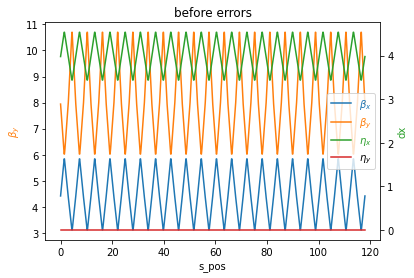

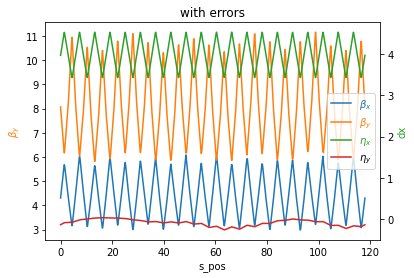

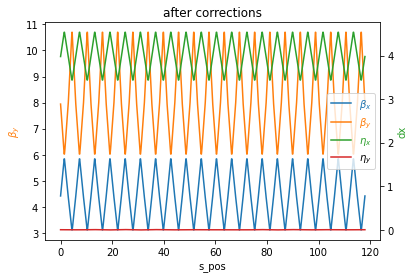

In [30]:
make_plot(twiss, 'before errors')
make_plot(twiss_error, 'with errors')
make_plot(twiss_corrected, 'after corrections')

In [31]:
getBetaBeat(twiss, twiss_error)
getBetaBeat(twiss, twiss_corrected)

getBetaBeat bx and by: 
Simulated beta beat, x:2.333484668271944%   y: 2.325044304656076%
getBetaBeat bx and by: 
Simulated beta beat, x:0.00036655319609419897%   y: 0.00041740287383779616%


In [32]:
Cxx_corr, Cxy_corr= ORM_x(1.e-4, ring)
Cyy_corr, Cyx_corr= ORM_y(1.e-4, ring)

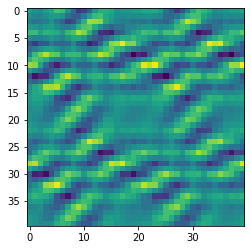

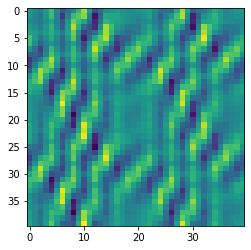

In [34]:
plt.figure()
imshow(Cxy_corr)
plt.show()

plt.figure()
imshow(Cyx_corr)
plt.show()

In [35]:
np.max(Cyx_corr-Cyx_error)

0.1465435727965766

In [36]:
Cyx_corr

array([[ 1.14369694e-03, -2.87421882e-04, -1.76655444e-03, ...,
        -5.80391595e-05,  9.99643388e-04,  1.01953094e-03],
       [ 4.32349763e-04, -1.06564941e-03, -2.73680150e-03, ...,
        -3.33272002e-04,  1.99707302e-04,  3.06634949e-04],
       [-5.02641739e-04, -1.26759785e-03, -2.23921060e-03, ...,
        -4.61296735e-04, -7.66994292e-04, -5.95186617e-04],
       ...,
       [ 1.41304983e-03, -7.58840310e-04, -3.10240433e-03, ...,
        -1.22938472e-03, -5.92568148e-04,  3.98106509e-04],
       [ 1.38328920e-03, -4.99311060e-04, -2.49401650e-03, ...,
        -6.69045311e-04,  8.57612392e-05,  7.00637336e-04],
       [ 1.77969642e-03, -5.39998922e-04, -2.96944266e-03, ...,
        -4.84152373e-04,  7.94992659e-04,  1.22565195e-03]])

In [37]:
Cyx_error

array([[ 0.01040282,  0.00420825, -0.00200461, ..., -0.01599305,
        -0.0153879 , -0.00226765],
       [ 0.00299019, -0.01241892, -0.03030071, ..., -0.01381664,
        -0.01661899, -0.00636162],
       [-0.00624778, -0.0221728 , -0.04171161, ..., -0.00526565,
        -0.01078059, -0.008019  ],
       ...,
       [ 0.00491475,  0.00417374,  0.00194795, ..., -0.05273978,
        -0.07544934, -0.03315833],
       [ 0.00759365,  0.00441163,  0.00039653, ..., -0.03661355,
        -0.04980585, -0.01982527],
       [ 0.0127989 ,  0.00608431, -0.00119876, ..., -0.03627029,
        -0.04470542, -0.01493233]])

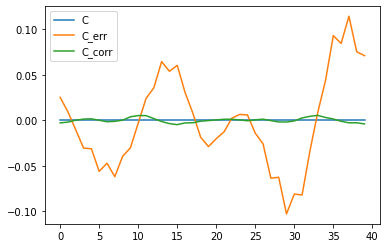

In [39]:
compare_orm(Cxy, Cxy_error, Cxy_corr, 25)